# HEALTHCARE APPOINTMENT NO-SHOW PREDICTION



## Import libraries

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

##  Step 1: Load data

In [22]:
df = pd.read_csv("C:\\Users\\DELL\\Downloads\\Medical Appointment No Shows\\KaggleV2-May-2016.csv")
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## Data Cleaning

In [ ]:
# Convert 'No-show' column to binary: 'No' -> 0 (attended), 'Yes' -> 1 (no-show)
df['No-show'] = df['No-show'].map({'No': 0, 'Yes': 1})
df['No-show']

In [25]:
# Convert appointment and scheduled dates to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['ScheduledDay']

0         2016-04-29
1         2016-04-29
2         2016-04-29
3         2016-04-29
4         2016-04-29
             ...    
110522    2016-05-03
110523    2016-05-03
110524    2016-04-27
110525    2016-04-27
110526    2016-04-27
Name: ScheduledDay, Length: 110527, dtype: object

In [26]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date
df['AppointmentDay']

0         2016-04-29
1         2016-04-29
2         2016-04-29
3         2016-04-29
4         2016-04-29
             ...    
110522    2016-06-07
110523    2016-06-07
110524    2016-06-07
110525    2016-06-07
110526    2016-06-07
Name: AppointmentDay, Length: 110527, dtype: object

## Feature engineering:

In [27]:
# days between scheduling and appointment
df['WaitDays'] = (pd.to_datetime(df['AppointmentDay']) - pd.to_datetime(df['ScheduledDay'])).dt.days
df['WaitDays']

0          0
1          0
2          0
3          0
4          0
          ..
110522    35
110523    35
110524    41
110525    41
110526    41
Name: WaitDays, Length: 110527, dtype: int64

In [29]:
df['Gender'] = df['Gender'].replace({'M': 0, 'F': 1})
df['Gender']

0         1
1         0
2         1
3         1
4         1
         ..
110522    1
110523    1
110524    1
110525    1
110526    1
Name: Gender, Length: 110527, dtype: int64

In [30]:
# Extract weekday of appointment (0=Monday, 6=Sunday)
df['AppointmentWeekday'] = pd.to_datetime(df['AppointmentDay']).dt.weekday
df['AppointmentWeekday']

0         4
1         4
2         4
3         4
4         4
         ..
110522    1
110523    1
110524    1
110525    1
110526    1
Name: AppointmentWeekday, Length: 110527, dtype: int32

In [31]:
# Select features and target
features = ['Gender', 'Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism',
            'Handcap', 'SMS_received', 'WaitDays', 'AppointmentWeekday']
X = df[features]
y = df['No-show']

In [32]:
X

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,WaitDays,AppointmentWeekday
0,1,62,0,1,0,0,0,0,0,4
1,0,56,0,0,0,0,0,0,0,4
2,1,62,0,0,0,0,0,0,0,4
3,1,8,0,0,0,0,0,0,0,4
4,1,56,0,1,1,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...
110522,1,56,0,0,0,0,0,1,35,1
110523,1,51,0,0,0,0,0,1,35,1
110524,1,21,0,0,0,0,0,1,41,1
110525,1,38,0,0,0,0,0,1,41,1


In [33]:
y

0         0
1         0
2         0
3         0
4         0
         ..
110522    0
110523    0
110524    0
110525    0
110526    0
Name: No-show, Length: 110527, dtype: int64

In [34]:
# Handle missing or invalid age values (negative ages)
X.loc[X['Age'] < 0, 'Age'] = X['Age'].median()
X

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,WaitDays,AppointmentWeekday
0,1,62,0,1,0,0,0,0,0,4
1,0,56,0,0,0,0,0,0,0,4
2,1,62,0,0,0,0,0,0,0,4
3,1,8,0,0,0,0,0,0,0,4
4,1,56,0,1,1,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...
110522,1,56,0,0,0,0,0,1,35,1
110523,1,51,0,0,0,0,0,1,35,1
110524,1,21,0,0,0,0,0,1,41,1
110525,1,38,0,0,0,0,0,1,41,1


In [35]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test 

(        Gender  Age  Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  \
 58187        1   25            0             0         0           0        0   
 5095         0   62            0             0         0           0        0   
 67919        1   65            0             0         0           0        0   
 2861         0   41            0             0         0           0        0   
 45949        0   61            0             1         0           1        0   
 ...        ...  ...          ...           ...       ...         ...      ...   
 76820        1   63            0             1         1           0        0   
 110268       0   31            0             0         0           0        0   
 103694       1   38            0             0         0           0        0   
 860          1   18            1             0         0           0        0   
 15795        0    9            1             0         0           0        0   
 
         SMS_r

## Model training 

In [36]:
# Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [37]:
# Predictions
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

## Evaluation

In [38]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7535510721071202
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85     17669
           1       0.34      0.25      0.29      4437

    accuracy                           0.75     22106
   macro avg       0.58      0.57      0.57     22106
weighted avg       0.73      0.75      0.74     22106

Confusion Matrix:
 [[15534  2135]
 [ 3313  1124]]


## Feature Importance Visualization

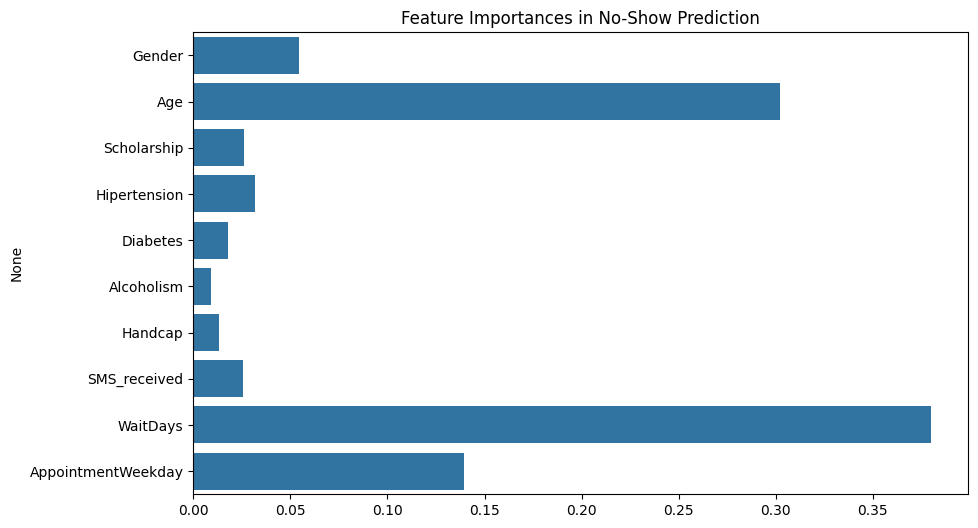

In [39]:
importances = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importances in No-Show Prediction')
plt.show()

No-show rates based on SMS reminders:
 SMS_received
0    0.167033
1    0.275745
Name: No-show, dtype: float64


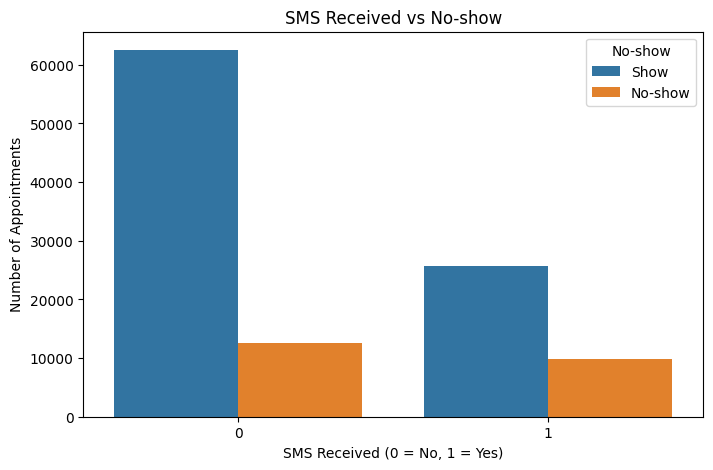

In [40]:
# Numerical insight
sms_no_show_rate = df.groupby('SMS_received')['No-show'].mean()
print("No-show rates based on SMS reminders:\n", sms_no_show_rate)

# Visual insight
plt.figure(figsize=(8, 5))
sns.countplot(x='SMS_received', hue='No-show', data=df)
plt.title('SMS Received vs No-show')
plt.xlabel('SMS Received (0 = No, 1 = Yes)')
plt.ylabel('Number of Appointments')
plt.legend(title='No-show', labels=['Show', 'No-show'])
plt.show()


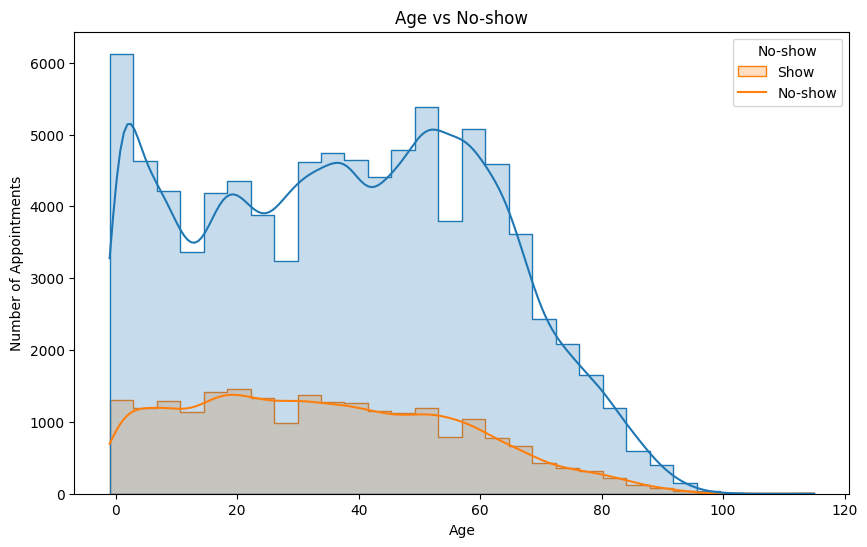

In [41]:
# Age vs No-show
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='No-show', bins=30, kde=True, element='step')
plt.title('Age vs No-show')
plt.xlabel('Age')
plt.ylabel('Number of Appointments')
plt.legend(title='No-show', labels=['Show', 'No-show'])
plt.show()

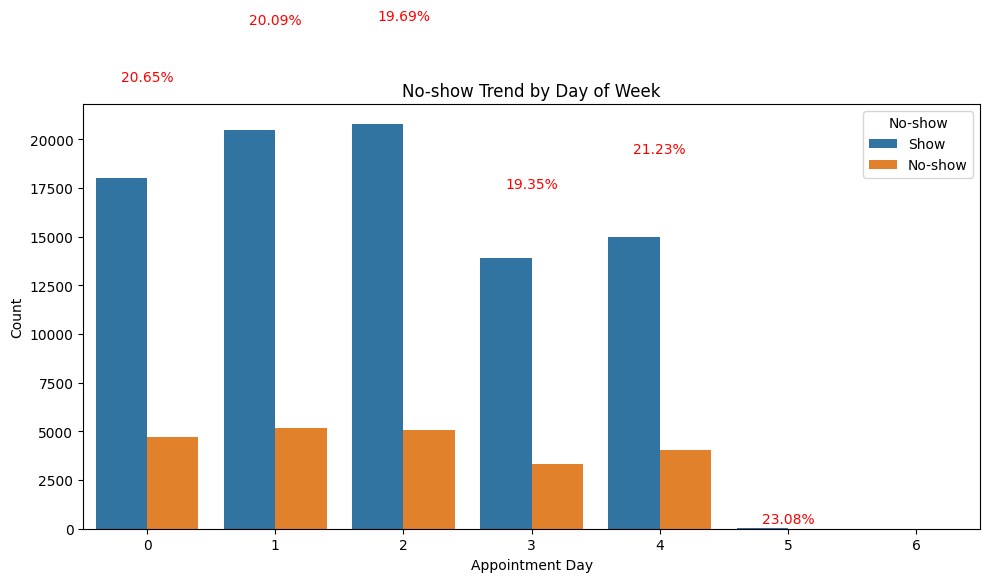

In [42]:
weekday_rate = df.groupby('AppointmentWeekday')['No-show'].mean()

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='AppointmentWeekday', hue='No-show',
                   order=[0,1,2,3,4,5,6])

# Annotate with no-show rates
for i, rate in weekday_rate.items():
    total = df[df['AppointmentWeekday'] == i].shape[0]
    ax.text(i, total + 100, f'{rate:.2%}', ha='center', va='bottom', fontsize=10, color='red')

plt.title('No-show Trend by Day of Week')
plt.xlabel('Appointment Day')
plt.ylabel('Count')
plt.legend(title='No-show', labels=['Show', 'No-show'])
plt.tight_layout()
plt.show()


In [49]:
df.to_csv("C:\\Users\\DELL\\Downloads\\Cleaned_Appointments_No-Shows_Prediction.csv", index= False)